In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mclr
import dill
from copy import deepcopy

In [2]:
with open('menu_transfer.pickle', 'rb') as infile:
    menu = dill.load(infile)

In [3]:
entry = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [4]:
pairs = {0: {'O', 'Z'},
 1: {'H', 'J'},
 2: {'Q', 'W'},
 3: {'G', 'H'},
 4: {'A', 'F'},
 5: {'R', 'T'},
 6: {'A', 'C'},
 7: {'B', 'T'},
 8: {'E', 'T'},
 9: {'A', 'T'},
 10: {'J', 'U'},
 11: {'J', 'T'},
 12: {'A', 'I'},
 13: {'D', 'F'},
 14: {'Q', 'U'},
 15: {'L', 'X'},
 16: {'C', 'D'},
 17: {'A', 'O'},
 18: {'V', 'Y'}}

In [5]:
pairs = {k:list(v) for k,v in pairs.items()}

In [6]:
edges = [(v[0],v[1],{'label':str(k)}) for k,v in pairs.items()]
## ,{'position':str(k)}
# edges

In [7]:
edges

[('Z', 'O', {'label': '0'}),
 ('J', 'H', {'label': '1'}),
 ('Q', 'W', {'label': '2'}),
 ('G', 'H', {'label': '3'}),
 ('A', 'F', {'label': '4'}),
 ('R', 'T', {'label': '5'}),
 ('A', 'C', {'label': '6'}),
 ('T', 'B', {'label': '7'}),
 ('E', 'T', {'label': '8'}),
 ('A', 'T', {'label': '9'}),
 ('J', 'U', {'label': '10'}),
 ('J', 'T', {'label': '11'}),
 ('A', 'I', {'label': '12'}),
 ('D', 'F', {'label': '13'}),
 ('Q', 'U', {'label': '14'}),
 ('X', 'L', {'label': '15'}),
 ('D', 'C', {'label': '16'}),
 ('O', 'A', {'label': '17'}),
 ('V', 'Y', {'label': '18'})]

In [8]:
MG = nx.MultiGraph()

In [9]:
# for p in edges:
#     MG.add_edge(u_for_edge=p[0], v_for_edge=p[1], label=p[2]['label'])

In [10]:
MG.add_edges_from(edges,)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [11]:
# MG.edges

In [12]:
# MG.nodes

In [13]:
pos = nx.spring_layout(MG,k=0.4,scale=1)

In [14]:
pos

{'Z': array([ 0.151665  , -0.23298742]),
 'O': array([ 0.20314492, -0.03524761]),
 'J': array([-0.39759608,  0.21165392]),
 'H': array([-0.53378113,  0.40089978]),
 'Q': array([-0.6440625 , -0.23102833]),
 'W': array([-0.74903854, -0.35861035]),
 'G': array([-0.48827702,  0.5722809 ]),
 'A': array([0.23352231, 0.20807877]),
 'F': array([0.46670212, 0.24425801]),
 'R': array([-0.24171998,  0.30715487]),
 'T': array([-0.0945672 ,  0.31709157]),
 'C': array([0.44775027, 0.13128077]),
 'B': array([-0.01800398,  0.50858307]),
 'E': array([-0.16536982,  0.50725793]),
 'U': array([-0.52993412, -0.03800267]),
 'I': array([0.32661804, 0.39134787]),
 'D': array([0.60927354, 0.16046261]),
 'X': array([ 0.16885396, -0.94521826]),
 'L': array([ 0.05555922, -1.        ]),
 'V': array([ 0.67246553, -0.62227643]),
 'Y': array([ 0.52679545, -0.49697899])}

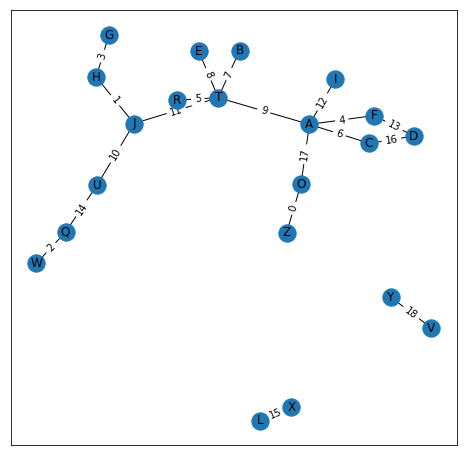

In [15]:
fig, ax = plt.subplots(figsize=(8,8))

nx.draw_networkx(MG,pos=pos)

labels = nx.get_edge_attributes(MG,'label')
labels = {(k[0],k[1]):v for k,v in labels.items()}  ## doesnt' seem to be able to deal with labels for multiples edges
edge_labels = nx.draw_networkx_edge_labels(MG,pos=pos,edge_labels=labels)

In [16]:
# G = nx.Graph()

In [17]:
# G.add_edges_from(edges)

In [18]:
# G.edges

In [19]:
# pos = nx.spring_layout(G) # positions for all nodes

# # nodes
# nx.draw_networkx_nodes(G,pos,node_size=400)

# # labels
# nx.draw_networkx_labels(G,pos,font_size=20,font_family='sans-serif')

# # edges
# nx.draw_networkx_edges(G,pos,edgelist=edges, width=6)

# # weights
# labels = nx.get_edge_attributes(G,'label')
# nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

In [20]:
menu

{8: {'in': 'Z',
  'out': 'E',
  'menu_link': 'ZZH',
  'conx_in': {},
  'conx_out': {2: 'out', 6: 'out'}},
 2: {'in': 'W',
  'out': 'E',
  'menu_link': 'ZZB',
  'conx_in': {},
  'conx_out': {8: 'out', 6: 'out'}},
 5: {'in': 'V',
  'out': 'T',
  'menu_link': 'ZZE',
  'conx_in': {},
  'conx_out': {4: 'in'}},
 4: {'in': 'T',
  'out': 'A',
  'menu_link': 'ZZD',
  'conx_in': {5: 'out'},
  'conx_out': {6: 'in'}},
 6: {'in': 'A',
  'out': 'E',
  'menu_link': 'ZZF',
  'conx_in': {4: 'out'},
  'conx_out': {8: 'out', 2: 'out'}},
 'config': {'test_char': 'E',
  'menu_link': 'QQQ',
  'in': 'E',
  'out': 'E',
  'conx_in': {8: 'out', 2: 'out', 6: 'out'},
  'conx_out': {8: 'out', 2: 'out', 6: 'out'}}}

In [21]:
edges[:3]

[('Z', 'O', {'label': '0'}),
 ('J', 'H', {'label': '1'}),
 ('Q', 'W', {'label': '2'})]

In [22]:
for c in entry:
    print(c)

A
B
C
D
E
F
G
H
I
J
K
L
M
N
O
P
Q
R
S
T
U
V
W
X
Y
Z


In [23]:
bombes = [k  if type(k) == int else 'REG' for k in menu.keys()]
bchars = [ch for ch in entry]
# bminimenu = {b:deepcopy(menu[b]) for b in bombes}
# bminimenu
print(bombes)
print(bchars)

[8, 2, 5, 4, 6, 'REG']
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [24]:
# cminimenu = deepcopy(bminimenu)
# for k,v in bminimenu.items():
#     for inorout in ['conx_in','conx_out']:
#         for n,l in v[inorout].items():

#             if n not in bombes:
#                 del cminimenu[k][inorout][n]
# bminimenu = deepcopy(cminimenu)
# del cminimenu
# bminimenu

In [25]:
iomap = {'in':'I', 'out':'O', 'conx_in':'I', 'conx_out':'O'}

In [26]:
## base graph just treating each scrambler as a single node
BG = nx.Graph()
BG.add_nodes_from(bombes)
BG.nodes

NodeView((8, 2, 5, 4, 6, 'REG'))

In [27]:
base_edges = set()
for scrambler,descriptor_dict in menu.items():
    if scrambler == 'config':
        pass
    else:
        for inorout in ['conx_in','conx_out']:
            for connected_scrambler,ior in descriptor_dict[inorout].items():  
                ## the dictionary of connections that is the value for each 'conx_in/out' keys
    #             print(scrambler, connected_scrambler)
                if connected_scrambler == 'config':
                    pass
                else:
                    base_edges.add(frozenset([scrambler,connected_scrambler]))
            
base_edges = [tuple(be) for be in base_edges]  # turn set of frozensets into list of tuples
print(base_edges)

[(8, 2), (4, 6), (2, 6), (4, 5), (8, 6)]


In [28]:
BG.add_edges_from(base_edges)
BG.edges

EdgeView([(8, 2), (8, 6), (2, 6), (5, 4), (4, 6)])

In [29]:
# base_pos = nx.spring_layout(BG,scale=0.05)
base_pos = nx.circular_layout(BG,scale=1)
# base_pos

In [30]:
base_pos

{8: array([1.00000000e+00, 2.45045699e-08]),
 2: array([0.49999998, 0.86602546]),
 5: array([-0.50000004,  0.8660254 ]),
 4: array([-9.99999970e-01, -6.29182054e-08]),
 6: array([-0.49999989, -0.86602541]),
 'REG': array([ 0.49999992, -0.86602541])}

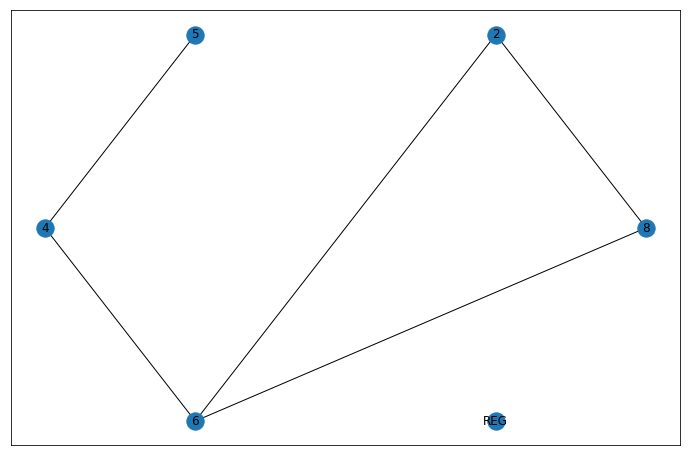

In [31]:
fig, ax = plt.subplots(figsize=(12,8))

nx.draw_networkx(BG,pos=base_pos)

In [32]:
TG = nx.Graph()

In [33]:
for bid in bombes:
    for i in iomap.values():
        for ch in entry:
#             this = f"{bid}-{i}-{ch}"
            TG.add_node(f"{bid}-{i}-{ch}")
# del this

In [34]:
# TG.nodes

In [35]:
grey = mclr.to_rgba('grey',0.5)
red = mclr.to_rgba('red',0.9)

In [36]:
edges = set()
for scrambler,v in menu.items():
    if scrambler == 'config':
        pass
    else:
        for inorout in ['conx_in','conx_out']:
            first_node = f"{scrambler}-{iomap[inorout]}-"
            for connected_scrambler,ior in v[inorout].items():
                second_node = f"{connected_scrambler}-{iomap[ior]}-"
                for ch in bchars:
                    edges.add(frozenset([first_node+ch,second_node+ch]))

edges = [list(fs) for fs in edges]
for e in edges:
    e.append({'color': grey})
edges = [tuple(fs) for fs in edges]
# print(edges)

In [37]:
TG.add_edges_from(edges)

In [38]:
# TG.edges

In [40]:
# %%time
width_of_bombe = 0.07
height_of_bombe = 0.04

wrange_of_letters = list(np.linspace(-0.5*width_of_bombe,0.5*width_of_bombe,26))

manual_pos = {}

for nd in TG.nodes():
    bid,io, ch = nd.split('-')
    try:
        bid = int(bid)
    except:
        pass
    x,y = base_pos[bid]
    
    if io == 'I':
        y += -0.5 * height_of_bombe
    else:
        y += 0.5 * height_of_bombe
        
    x += wrange_of_letters[entry.index(ch)]
    manual_pos[nd] = np.array([x,y])

# manual_pos

In [41]:
# TG.edges[('6-I-A', '17-I-A')]['color'] = red

In [42]:
colors = [TG[u][v]['color'] for u,v in TG.edges()]
# colors

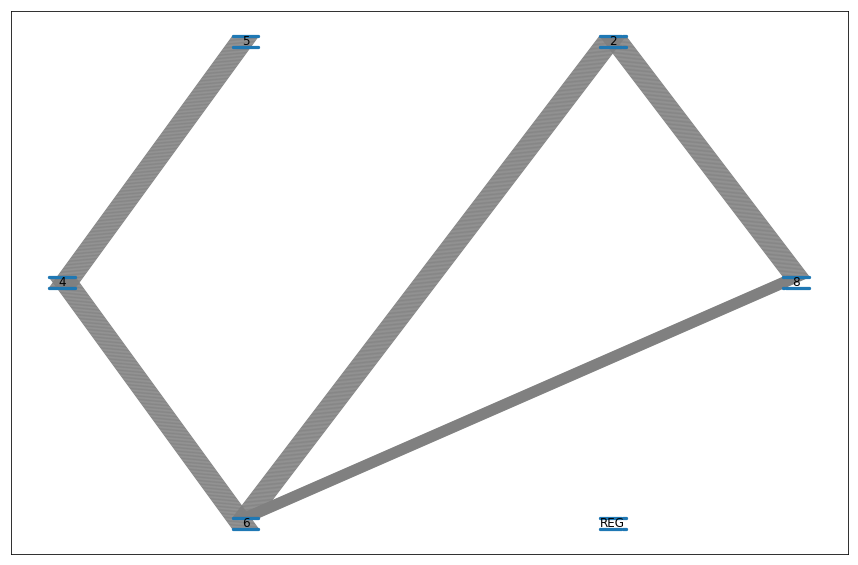

In [47]:
fig, ax = plt.subplots(figsize=(15,10))

nx.draw_networkx_labels(BG,pos=base_pos)

nx.draw_networkx_edges(TG,pos=manual_pos,edge_color=colors)
nx.draw_networkx_nodes(TG,pos=manual_pos, node_size=5)

plt.show()

In [294]:
# manual_pos

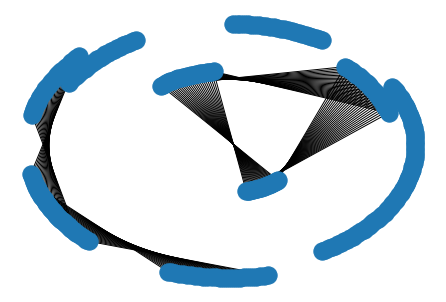

In [53]:
nx.draw_kamada_kawai(TG)